#**INTRODUCCIÓN AL CÁLCULO CON PYTHON**
**Python** es un lenguaje de programación multiplataforma y de código abierto que puede utilizarse tanto para desarrollo web, creación de software y procesamiento de datos, entre muchos otros propósitos. Las cosas que puedes hacer con Python son prácticamente ilimitadas. Como por ejemplo para extraer datos de Twitter con Python o crear tu propio Bot de Telegram. Hoy vamos a dar una breve mirada de sus posibilidades con el cálculo
**Colab** tiene dos tipos de celdas: texto y código. Las celdas de texto usan un lenguaje de marca llamado Markdown. Sin embargo reconoce lenguage Latex que es el que vamos a usar, latex es un lenguaje utilizado para escribir documentos de matemática e ingeniería.

Vamos a utilizar dos librerías numpy permite el cálculo numérico y simpy permite el cálculo simbólico

In [2]:
from numpy import* #numérico
import numpy as np #llame la función con np
from sympy import* #simbólico


Queremos definir la función $f(x)=\sqrt{x+2}$ en phyton lo hacemos de utilizando el comando def


In [3]:
def f(x):
  return np.sqrt(x+2)
  

En este ejemplo, primero estamos importando la librería numpy, para trabajar más fácilmente con vectores, los cuales simplifican los cálculos numéricos. Luego utilizamos la instrucción def para definir la función, que este caso se va a llamar f y va a tener como único parámetro al objeto x. Esta función nos va a devolver el valor de la raíz cuadrada de x+2. Ahora, si por ejemplo quisiéramos saber los valores de la función f(x) para los x,−2,−1,0,2,4 y 6. podríamos invocar a esta función de la siguiente manera:

In [4]:
x = np.array([-2, -1, 0, 2, 4, 6])  # Creando el vector de valores de x
y = f(x)
y

array([0.        , 1.        , 1.41421356, 2.        , 2.44948974,
       2.82842712])

Si quisiéramos verlo en forma de tabla, podemos ayudarnos de la librería pandas y su estructura de datos DataFrame, la cual tiene una forma tabular.

In [ ]:
import pandas as pd

tabla = pd.DataFrame( list(zip(x, y)), columns=['x', 'f(x)'] )
tabla

,x,f(x)
0,-2,0.000000
1,-1,1.000000
2,0,1.414214
3,2,2.000000
4,4,2.449490
5,6,2.828427


Por último, si quisiéramos graficar funciones con Python, podemos utilizar la librería Matplotlib, y pasarle los valores de x e y al método plot del objeto pyplot.

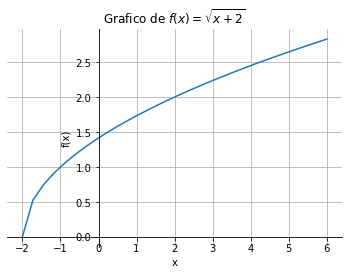

In [ ]:
import matplotlib.pyplot as plt # se llama a la libreria Matplotlib 

def move_spines():  # Crea la figura de pyplot y los ejes, mueve el centro de la fig
    fix, ax = plt.subplots()
    for spine in ["left", "bottom"]:  #izquierda, abajo
        ax.spines[spine].set_position("zero")
    for spine in ["right", "top"]: #derecha, arriba
        ax.spines[spine].set_color("none")
    return ax
x = np.linspace(-2, 6, num=30) #(valor-inicial, valor-final, número de valores)
ax = move_spines()
ax.grid() 
ax.plot(x, f(x))
plt.title(r"Grafico de $f(x)=\sqrt{x + 2}$")
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

# **Límites**
Así por ejemplo si analizamos la función $f(x)=x^2−x+2$, para los valores cercanos a 2, podríamos ver los siguientes resultados.

In [ ]:
def f(x):
    return x**2 - x + 2

x = np.array([1, 1.5, 1.9, 1.95, 1.99, 1.999, 2.001, 2.05, 2.1, 2.2, 2.5, 3 ])
y = f(x)
tabla = pd.DataFrame(list(zip(x, y)), columns=['x', 'f(x)'])
tabla

,x,f(x)
0,1.000,2.000000
1,1.500,2.750000
2,1.900,3.710000
3,1.950,3.852500
4,1.990,3.970100
5,1.999,3.997001
6,2.001,4.003001
7,2.050,4.152500
8,2.100,4.310000
9,2.200,4.640000


De acuerdo con esta tabla, podemos ver que a medida que hacemos al valor de x cercano a 2, vemos que f(x) se hace muy cercana a 4. Incluso podríamos hacer a f(x) tan cercana como queramos a 4, haciendo que x este lo suficientemente cerca de 2. Por lo tanto, podemos expresar esta propiedad diciendo que el "Límite de la función f(x)=x2−x+2 cuando x se acerca a 2 es igual a 4." y lo podemos representar Gráficamente  del siguiente modo.

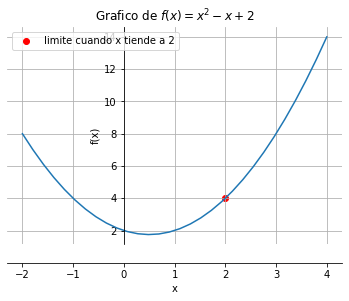

In [ ]:
x = np.linspace(-2, 4, num=30)

ax = move_spines()
ax.grid()
ax.plot(x, f(x))
ax.scatter(2, 4, label="limite cuando x tiende a 2", color='r')
plt.legend()
plt.title(r"Grafico de $f(x)=x^2 -x + 2$")
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

## Limites simbolicos
Su sintaxis es la siguiente: Limit(función, variable, punto). Entonces para calcular el límite de f(x) cuando x tiende a 2, debemos escribir:


In [ ]:
x = Symbol('x') # Creando el simbolo x.
Limit(x**2 - x + 2, x, 2)

Limit(x**2 - x + 2, x, 2)

In [ ]:
# Resolviendo el Limite con el metodo doit()
Limit(x**2 - x + 2, x, 2).doit()

4

# **DERIVADAS**
Con Python, podemos resolver Derivadas utilizando nuevamente la librería SymPy. En este caso, ahora vamos a utilizar el objeto Derivative. Su sintaxis es la siguiente: Derivative(funcion, variable, orden de derivación). Lo utilizamos de la siguiente forma:


In [ ]:
fx = (2*x + 1)*(x**3 + 2)
dx = Derivative(fx, x).doit()
dx

2*x**3 + 3*x**2*(2*x + 1) + 4

In [ ]:
# simplificando los resultados
simplify(dx)

8*x**3 + 3*x**2 + 4

In [ ]:
# Derivada de segundo orden con el 3er argumento.
Derivative(fx, x, 2).doit()

6*x*(4*x + 1)

In [ ]:
# Calculando derivada de (3x +1) / (2x)
fx = (3*x + 1) / (2*x)
dx = Derivative(fx, x).doit()
simplify(dx)

-1/(2*x**2)

In [ ]:
# la función diff nos da directamente el resultado
simplify(diff(fx, x))

-1/(2*x**2)

# **INTEGRALES**


In [ ]:
x = Symbol('x')
y = Symbol('y')
i = Symbol('i')
n = Symbol('n')

## **Notación Sigma**

Podemos representar sumas en notación sigma y calcular su suma.

Vamos a calcular $\displaystyle{\sum_{i=1}^{10} i^2}$

In [ ]:
square_sum = Sum(i**2, (i, 1, 10))
square_sum

Sum(i**2, (i, 1, 10))

A continuación, para calcular la suma usammos el comando doit()

In [ ]:
square_sum.doit()

385

## **Sumas de Riemann**

Ahora vamos a calcular áreas bajo la curva por medio de sumas de Riemann.

Calculemos $\displaystyle{\sum_{i=1}^n \frac{i^2}{n^3}}$, para ello utilizamos el comando Sum(). 

In [ ]:
sq_sum = Sum(i**2/n**3, (i, 1, n)).doit()
sq_sum

(n**3/3 + n**2/2 + n/6)/n**3

Ahora calculamos el límite de la suma de Riemann utilizando limit()

In [ ]:
sq_sum.limit(n, oo)

1/3

## **Integrales Definidas**

Para calcular integrales de la forma $ \displaystyle{\int_a^b f(x)\,dx} $ utilizamos el comando integrate()

In [ ]:
integrate(x**2, x)

x**3/3

## **Integrales impropias**

Para calcular integrales de la forma $ \displaystyle{\int_{a}^{\infty} f(x)\,dx} $ utilizamos el comando integrate() y el símbolo "oo" para representar $\infty$.

In [ ]:
integrate(1/x**2, (x, 1, oo))

1

# **Aplicaciones** 
Una empresa está considerando una inversión de 5 años y estima que dentro de $t$ años la inversión estará generando un flujo de ingresos de $3000 + 50t$ dólares por año. Si la tasa prevaleciente de interés anual permanece fija en $4\%$, y es capitalizada continuamente durante los 5 años ¿cuál es la inversión en 5 años?

El valor de la inversión  se mide como el valor futuro del flujo de ingreso en el término de 5 años es:
$\displaystyle{VF= \int_0^T f(t) e^{r(T-t)}} dt$

## $VF=\displaystyle {\int_0^5 (3000+50t)} e^{0.04(5-t)} \, dt$




In [ ]:
x=Symbol('x')
u=Symbol('u')
f=Symbol('f')
g=Symbol('g')
u=0.04*(5-x)
f=exp(u)
g=3000+50*x

In [ ]:
integrate(g*f,(x,0,5))

17274.0430545180